In [1]:
# Import the required libraries
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the GTZAN dataset from the data directory
base_dir = '../data/gtzan'

data = []

for label in os.listdir(base_dir):
    label_dir = base_dir + f"/{label}"
    if os.path.isdir(label_dir):
        for file in os.listdir(label_dir):
            if file.endswith(".wav"):
                file_path = label_dir + f"/{file}"
                data.append({"file_path": file_path, "label": label})

In [3]:
# Put the data in a DataFrame and display the first few rows for observation
dataframe = pd.DataFrame(data)

display(dataframe.head(10))

,file_path,label
0,../data/gtzan/blues/blues.00000.wav,blues
1,../data/gtzan/blues/blues.00001.wav,blues
2,../data/gtzan/blues/blues.00002.wav,blues
3,../data/gtzan/blues/blues.00003.wav,blues
4,../data/gtzan/blues/blues.00004.wav,blues
5,../data/gtzan/blues/blues.00005.wav,blues
6,../data/gtzan/blues/blues.00006.wav,blues
7,../data/gtzan/blues/blues.00007.wav,blues
8,../data/gtzan/blues/blues.00008.wav,blues
9,../data/gtzan/blues/blues.00009.wav,blues


In [4]:
# Count the number of files for each label
print(dataframe['label'].value_counts())

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64


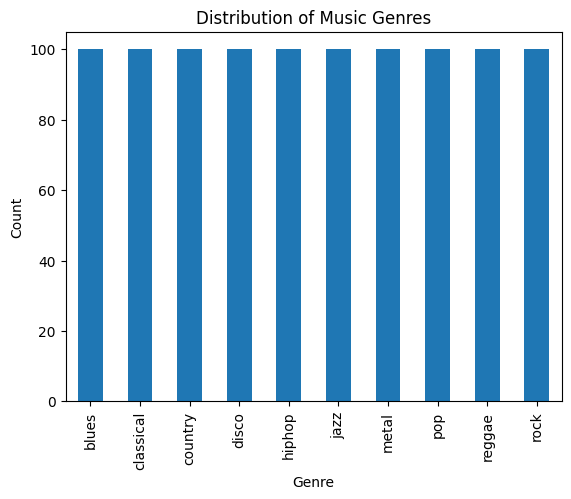

In [5]:
# Plot the label distribution
dataframe['label'].value_counts().plot(kind='bar', title='Distribution of Music Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [6]:
# Reassign labels from genres to moods
genre_to_mood = {
    "blues": "sad",
    "classical": "calm",
    "country": "sad",
    "disco": "happy",
    "hiphop": "energetic",
    "jazz": "calm",
    "metal": "energetic",
    "pop": "happy",
    "reggae": "calm",
    "rock": "energetic"
}

dataframe['mood'] = dataframe['label'].map(genre_to_mood)

display(dataframe.head(10))

,file_path,label,mood
0,../data/gtzan/blues/blues.00000.wav,blues,sad
1,../data/gtzan/blues/blues.00001.wav,blues,sad
2,../data/gtzan/blues/blues.00002.wav,blues,sad
3,../data/gtzan/blues/blues.00003.wav,blues,sad
4,../data/gtzan/blues/blues.00004.wav,blues,sad
5,../data/gtzan/blues/blues.00005.wav,blues,sad
6,../data/gtzan/blues/blues.00006.wav,blues,sad
7,../data/gtzan/blues/blues.00007.wav,blues,sad
8,../data/gtzan/blues/blues.00008.wav,blues,sad
9,../data/gtzan/blues/blues.00009.wav,blues,sad


In [7]:
# Count the number of files for each mood
print(dataframe['mood'].value_counts())

mood
calm         300
energetic    300
sad          200
happy        200
Name: count, dtype: int64


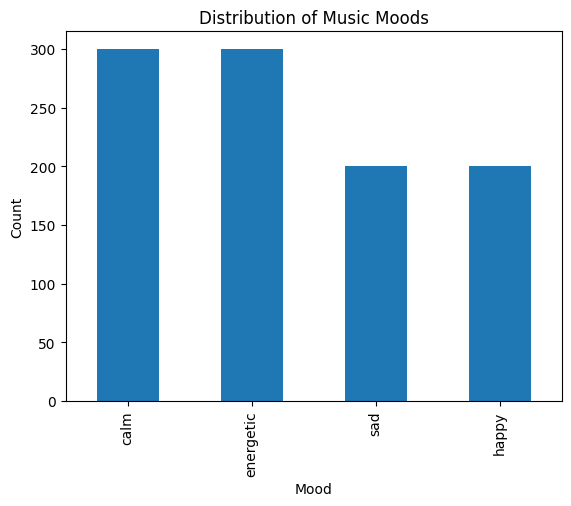

In [8]:
# Plot the mood distribution
dataframe['mood'].value_counts().plot(kind='bar', title='Distribution of Music Moods')
plt.xlabel('Mood')
plt.ylabel('Count')
plt.show()

In [9]:
# Extract MFCC for a sample file
import librosa

y, sr = librosa.load("../data/gtzan/blues/blues.00000.wav", duration=30) # Duration set for consistency
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

In [10]:
# Get the mean MFCCs for each file
import numpy as np

np.mean(mfcc, axis=1)

array([-113.619385 ,  121.55302  ,  -19.151056 ,   42.345768 ,
         -6.3711677,   18.613033 ,  -13.69206  ,   15.339378 ,
        -12.283617 ,   10.973775 ,   -8.32241  ,    8.8067875,
         -3.665802 ], dtype=float32)